Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Logistic Regression: Problem solving

In this session, you will predict whether or not a candy is popular based on its other properties.
This dataset [was collected](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) to discover the most popular Halloween candy.

| Variable         | Type              | Description                                                  |
|:-----------------|:------------------|:--------------------------------------------------------------|
| chocolate        | Numeric (binary)  | Does it contain chocolate?                                   |
| fruity           | Numeric (binary)  | Is it fruit flavored?                                        |
| caramel          | Numeric (binary)  | Is there caramel in the candy?                               |
| peanutalmondy    | Numeric (binary)  | Does it contain peanuts, peanut butter or almonds?           |
| nougat           | Numeric (binary)  | Does it contain nougat?                                      |
| crispedricewafer | Numeric (binary)  | Does it contain crisped rice, wafers, or a cookie component? |
| hard             | Numeric (binary)  | Is it a hard candy?                                          |
| bar              | Numeric (binary)  | Is it a candy bar?                                           |
| pluribus         | Numeric (binary)  | Is it one of many candies in a bag or box?                   |
| sugarpercent     | Numeric (0 to 1)  | The percentile of sugar it falls under within the data set.  |
| pricepercent     | Numeric (0 to 1)  | The unit price percentile compared to the rest of the set.   |
| winpercent       | Numeric (percent) | The overall win percentage according to 269,000 matchups     |
| popular | Numeric (binary) | 1 if win percentage is over 50% and 0 otherwise |

**Source:** This dataset is Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license.

**Note the numeric/binary columns are really nominal disguised as numeric.**

## Load the data

Start by loading `readr`, `dplyr`, and `tibble`.

In [3]:
library(readr)
library(dplyr)
library(tibble)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="_:K|OW8bxsgYaKGyO,SL">tibble</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="X=_R*qQj+UIHe#56hjCm"><field name="libraryName" id="_:K|OW8bxsgYaKGyO,SL">tibble</field></block></next></block></next></block></xml>

Load a dataframe with `"datasets/candy-data.csv"`, setting `competitorname` to row names, and display the dataframe.

*Hint: `tibble::column_to_rownames`*

In [5]:
dataframe = readr::read_csv("datasets/candy-data.csv") %>%
    tibble::column_to_rownames(var = "competitorname")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="_:K|OW8bxsgYaKGyO,SL">tibble</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="2" y="176"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="3).iDp;Sc.=6x!n-s^1h"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/candy-data.csv</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id=")#=zq./j*ftf0:lgs+eU"><mutation items="1"></mutation><field name="VAR" id="_:K|OW8bxsgYaKGyO,SL">tibble</field><field name="MEMBER">column_to_rownames</field><data>tibble:column_to_rownames</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="RK_|@dw61NgV;,E={Ps5"><field name="CODE">var = "competitorname"</field></block></value></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 85 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): competitorname
dbl (13): chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewaf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.46628,0
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.01190,0
WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.37552,0


## Explore the data

Load `base`, `ggplot2`, `psych`, and `corrr`.

In [6]:
library(corrr)
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj" x="-86" y="-4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




### Descriptive statistics

Describe the data.

In [7]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="T0@e2gJUI4JSH/hR}Ww;" x="-132" y="176"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="|?#9B(~d`]d^x)Ge=Szm"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chocolate,1,85,0.43529412,0.4987379,0,0.42028986,0,0,1,1,0.2564258,-1.956854,0.05409572
fruity,2,85,0.44705882,0.5001400,0,0.43478261,0,0,1,1,0.2092148,-1.979099,0.05424780
caramel,3,85,0.16470588,0.3731162,0,0.08695652,0,0,1,1,1.7761196,1.168765,0.04047013
peanutyalmondy,4,85,0.16470588,0.3731162,0,0.08695652,0,0,1,1,1.7761196,1.168765,0.04047013
nougat,5,85,0.08235294,0.2765332,0,0.00000000,0,0,1,1,2.9850566,6.993250,0.02999423
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
pluribus,9,85,0.5176471,0.5026540,1.00000,0.5217391,0.000000,0.00000,1.00000,1.00000,-0.06938946,-2.0185188,0.05452048
sugarpercent,10,85,0.4786471,0.2827779,0.46500,0.4751884,0.363237,0.01100,0.98800,0.97700,0.09207453,-1.1795688,0.03067157
pricepercent,11,85,0.4688824,0.2857396,0.46500,0.4631449,0.311346,0.01100,0.97600,0.96500,0.12797969,-1.1967600,0.03099281


Remember that for the 0/1 variables, the mean reflects the average presence of an ingredient in candy.
For example, `chocolate` is in 43.5% of candy.

**QUESTION:**

What is the least common ingredient (there may be more than one that is the same)?

**ANSWER: (click here to edit)**

*`nougat` and `crispedricewafer`*

**QUESTION:**

What is the most common ingredient?

**ANSWER: (click here to edit)**

*`fruity` is, surprisingly.*

**QUESTION:**

Do you see any problems with the data, e.g. missing data?

**ANSWER: (click here to edit)**

*No*

### Correlations

Create and display a correlation matrix.

In [8]:
corrMatrix = dataframe %>%
    corrr::correlate()

corrMatrix

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable></variables><block type="variables_set" id="8d*5ftVjQpD/,GMoM7#R" x="-106" y="-488"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field><value name="VALUE"><block type="pipe_R" id="Ci6ag7aM_Te2e!$gdW]%"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="KlI~h3g!8nT6n-CIUkmZ"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="%Zv;ksCV1jS7x@y%-i?7"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value></block></value></block><block type="variables_get" id="^`OuX[^9.Qk3Ef^s~e*Y" x="-113" y="-360"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></xml>

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chocolate,NA,-0.7417211,0.24987535,0.37782357,0.2548918,0.34120978,-0.3441769,0.5974211,-0.3396752,0.10416906,0.5046754,0.6365167,0.5249366
fruity,-0.7417211,NA,-0.33548538,-0.39928014,-0.2693671,-0.26936712,0.3906775,-0.5150656,0.2997252,-0.03439296,-0.4309685,-0.3809381,-0.3055874
caramel,0.2498753,-0.3354854,NA,0.05935614,0.3284928,0.21311310,-0.1223551,0.3339600,-0.2695850,0.22193335,0.2543271,0.2134163,0.2276508
peanutyalmondy,0.3778236,-0.3992801,0.05935614,NA,0.2131131,-0.01764631,-0.2055566,0.2604196,-0.2061093,0.08788927,0.3091532,0.4061922,0.3549555
nougat,0.2548918,-0.2693671,0.32849280,0.21311310,NA,-0.08974359,-0.1386750,0.5229764,-0.3103388,0.12308135,0.1531964,0.1993753,0.1535805
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
pluribus,-0.3396752,0.29972522,-0.2695850,-0.20610932,-0.3103388,-0.22469338,0.01453172,-0.59340892,NA,0.04552282,-0.2207936,-0.2474479,-0.1506398
sugarpercent,0.1041691,-0.03439296,0.2219333,0.08788927,0.1230814,0.06994969,0.09180975,0.09998516,0.04552282,NA,0.3297064,0.2291507,0.1823165
pricepercent,0.5046754,-0.43096853,0.2543271,0.30915323,0.1531964,0.32826539,-0.24436534,0.51840654,-0.22079363,0.32970639,NA,0.3453254,0.3613571


**QUESTION:**

What property is most positively related to being popular?
What property is most negatively related to being popular?

**ANSWER: (click here to edit)**

*`chocolate` is most positively related to popularity and `hard` is most negatively related.*

Create a heatmap for the correlation matrix.

*Hint: You can rotate the x-axis labels by putting `rplot` inside `make plot` and adding `ggplot2::theme` using `axis.text.x = element_text(angle = 60, hjust = 1)` to `make plot`.*

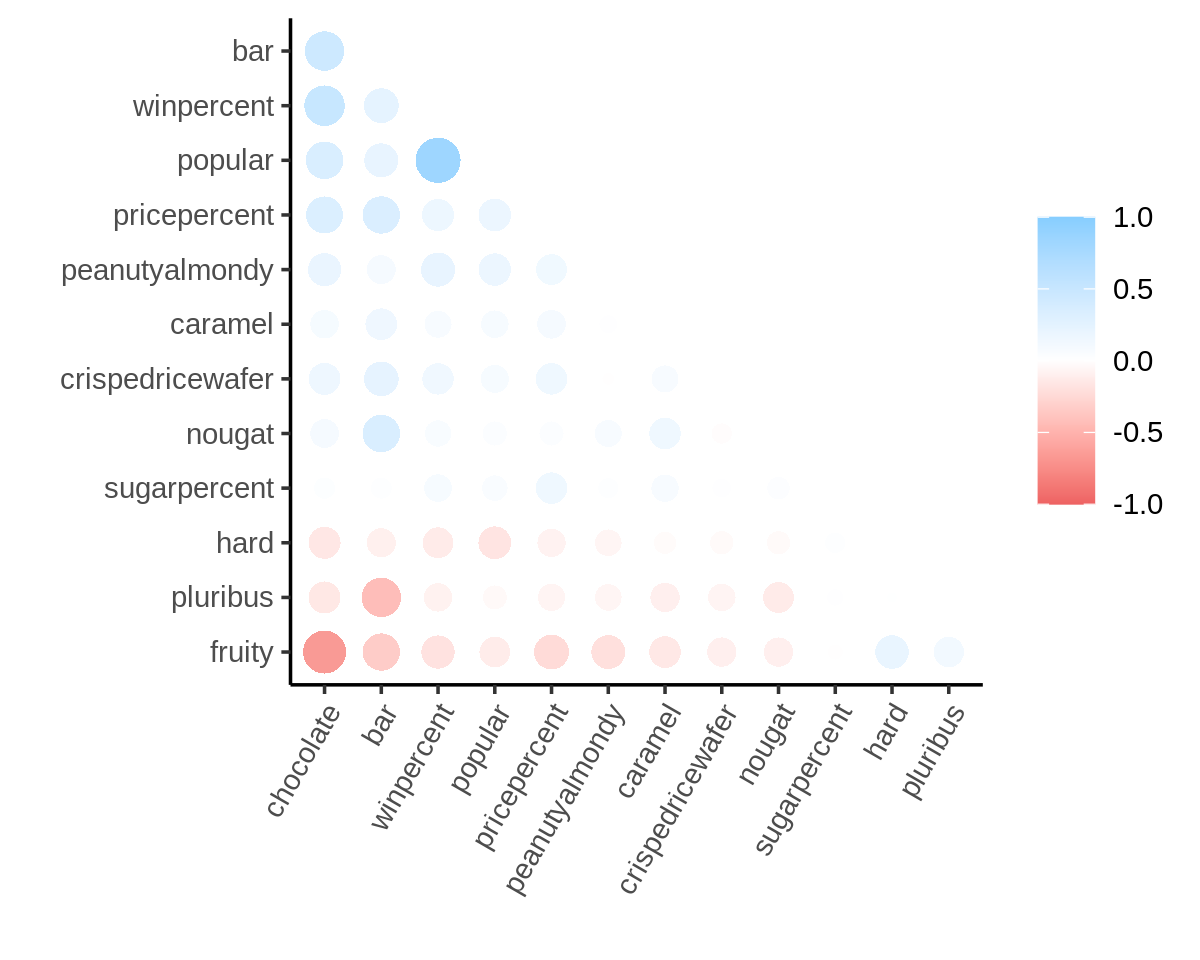

In [11]:
corrMatrix %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot() +
    ggplot2::theme(axis.text.x = element_text(angle = 60, hjust = 1))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="pipe_R" id="jI{JJE%`Lri!8Z9tiY6Y" x="-21" y="-271"><mutation items="3"></mutation><value name="INPUT"><block type="variables_get" id="-vxK9zE!IU_i$Us@*8x!"><field name="VAR" id="+fxL=2Fsb~[PLqWXWM[=">corrMatrix</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="|M8DM]xCy`6T0bV1?R1K"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="cu-?GG]G.HrY?/GyE~nE"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD2"><block type="ggplot_plus_R" id="k2h*{8dg+lu;K@5k[=HC"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="j=a0p{j[O4)zBg1}J3K8"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="qnmQwX4y`q2-vqp]iTC8"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">theme</field><data>ggplot2:theme</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="oaHzpO1FS)+#I~E`-6Q?"><field name="CODE">axis.text.x = element_text(angle = 60, hjust = 1)</field></block></value></block></value></block></value></block></xml>

**QUESTION:**

What color is strongly negative, what color is zero, and what color is strongly positive?

**ANSWER: (click here to edit)**

*Negative is dark red, zero is white, and positive is blue.*

**QUESTION:**

What's going on with `popular` and `winpercent`?

**ANSWER: (click here to edit)**

*`popular` and `winpercent` are highly correlated, but that's because `popular` is based on `winpercent`. So we should ignore it.*

### Histograms

For binary variables, histograms don't tell us anything that the descriptives don't already tell us.

However, there are two percent-type variables to plot, `sugarpercent` and `pricepercent`.

Plot a histogram of `sugarpercent`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


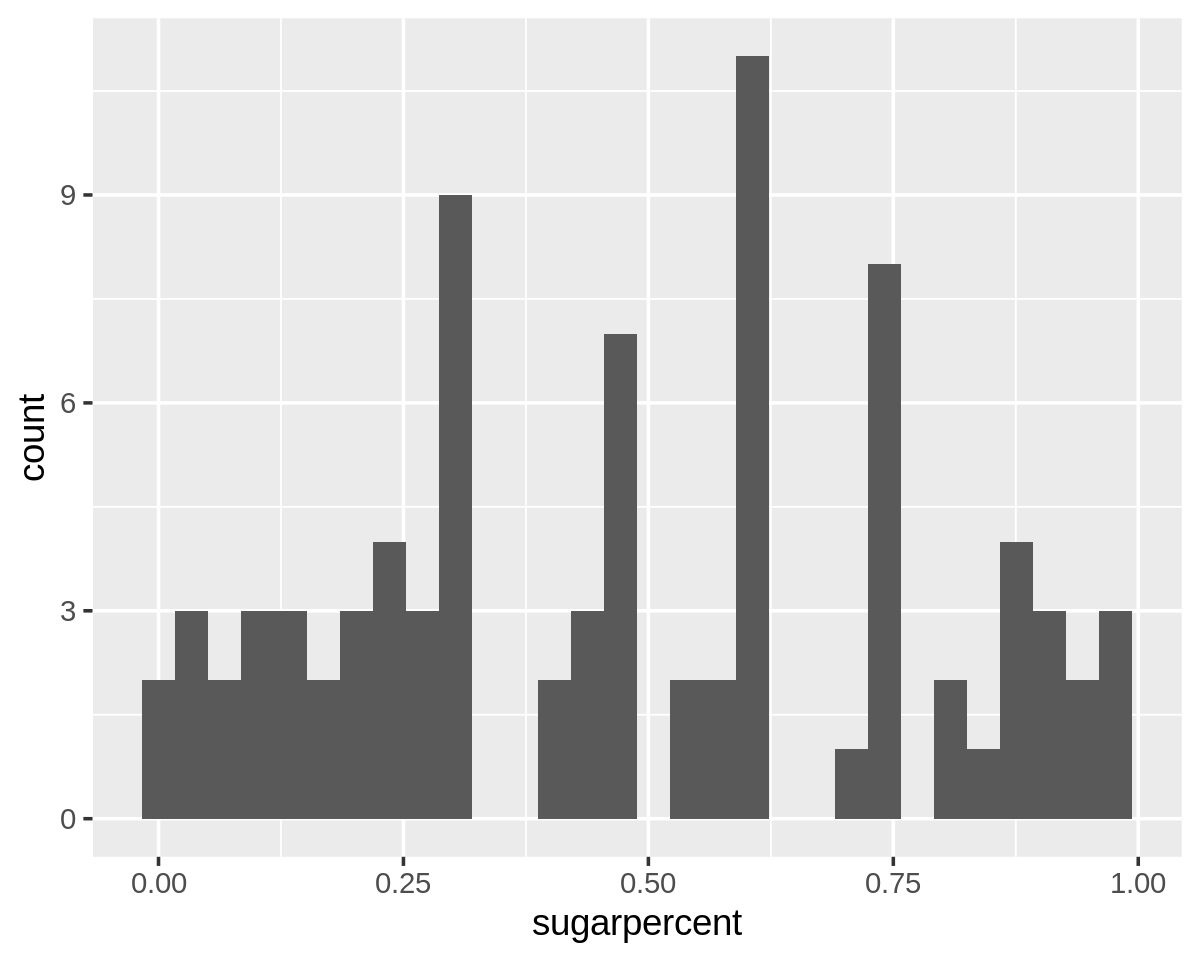

In [21]:
ggplot2::ggplot(dataframe,aes(x=sugarpercent)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="kC[d/p-#[]Jm%j^o_|qY" x="59" y="-265"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="XFa1GjX`e1(!JIdDrBGZ"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="bouJt,Y{0[nv`BDxtvMd"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="hlE|+9~PfNT~en+/i7ta"><field name="CODE">aes(x=sugarpercent)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="3ud(2/w0w@L-B{Z.0-jV"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

Plot a histogram of `pricepercent`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


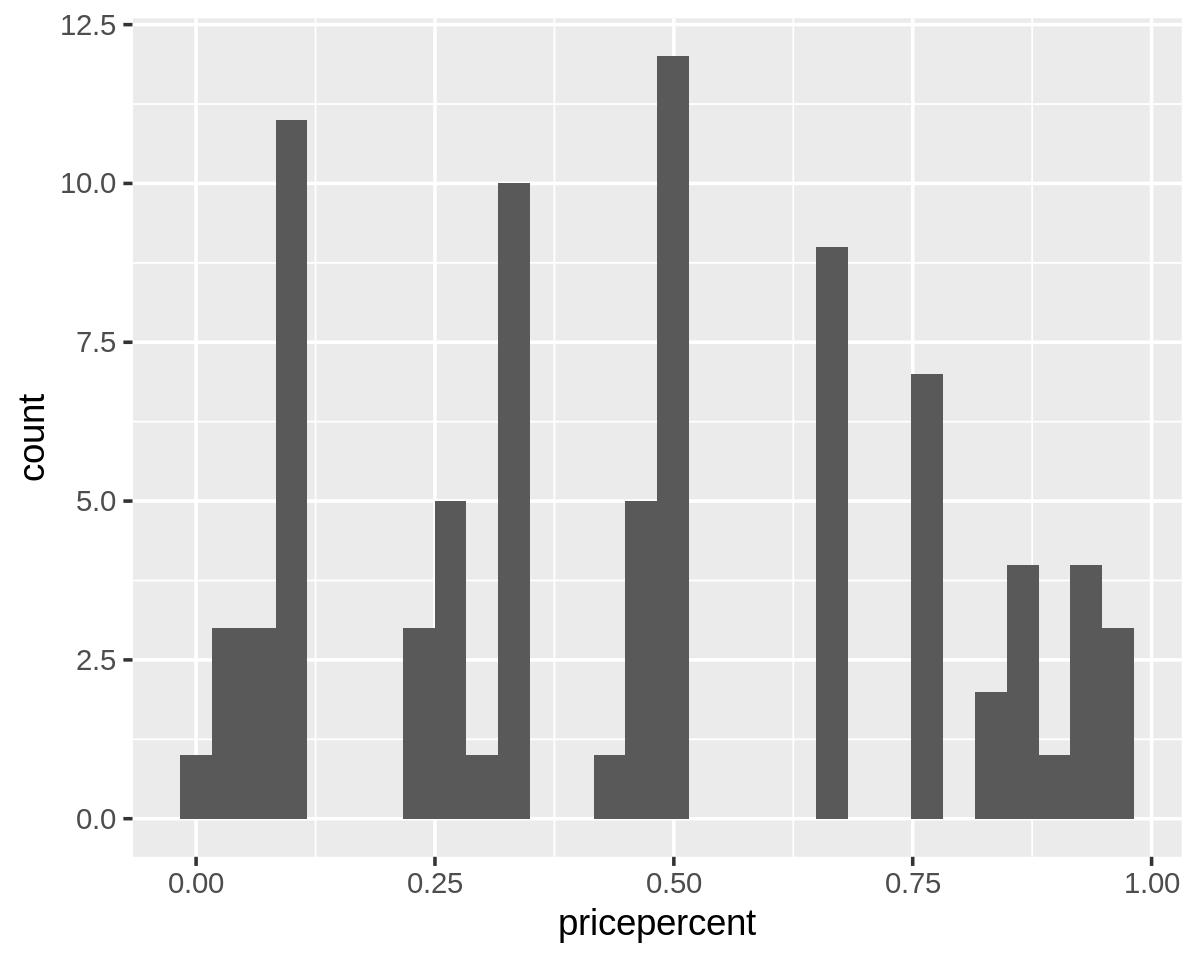

In [22]:
ggplot2::ggplot(dataframe,aes(x=pricepercent)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="kC[d/p-#[]Jm%j^o_|qY" x="59" y="-265"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="XFa1GjX`e1(!JIdDrBGZ"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="bouJt,Y{0[nv`BDxtvMd"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="hlE|+9~PfNT~en+/i7ta"><field name="CODE">aes(x=pricepercent)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="3ud(2/w0w@L-B{Z.0-jV"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

**QUESTION:**

What can you say about the distributions of `sugarpercent` and `pricepercent`?
Is there anything we should be concerned about?

**ANSWER: (click here to edit)**

*They are both pretty spiky with some flatish regions. If the binning is smaller, they become more normal. Nothing about them seems concerning, though it is notable that some values seem overrepresented.*

## Prepare train/test sets

You need to split the dataframe into training data and testing data, so start by loading `rsample`.

In [23]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="g^doBJYp/fk!)^uuYnUf" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Now split the data, but first convert `popular` to a factor, which is a requirement of the model, and drop `winpercent`, since it is a proxy for `popular`.

*Hint: You can drop a column using `dplyr::select` using `-variable`. The alternative is to list all the columns you want to keep, which may be a long list.*

In [25]:
dataframe = dataframe %>%
    dplyr::mutate(popular=factor(popular)) %>%
    dplyr::select(-winpercent)

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="pqe,bA|(visJQd48=Wf~" x="-137" y="113"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="KA=hLd3r{UKxA_qN8jzu"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="qw7eF};{$f3x1Rr0U6gS"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="-00s4E.d(nD9%clg}Wi%"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="GBV01=On`usB9nUSdhBA"><field name="CODE">popular=factor(popular)</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="U8`U;f4R0(Iy^y6!qN~f"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">select</field><data>dplyr:select</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id=",BDvude42=?=@A4H*0y?"><field name="CODE">-winpercent</field></block></value></block></value></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,popular
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,0
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0
Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,0
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,1
Haribo Twin Snakes,0,1,0,0,0,0,0,0,1,0.465,0.465,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,1
Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,1
Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,1


## Logistic regression model

Load the `recipes` and `workflows` packages, along with `parsnip`, `generics`, `hardhat`, and `broom`.

**NOTE: technically we don't need to scale anything and so don't need a workflow.**

In [44]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="cegz.xTQ~Bq[q~wqZQHD"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:yardstick’:

    accuracy


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


**QUESTION:**

Why don't we need to scale anything?

**ANSWER: (click here to edit)**

*All the variables are between 0 and 1, so they are basically on the same scale. In general, we don't need to scale for regression, though some people prefer to do that.*

Make a workflow to predict label using logistic regression, without scaling anything.

In [27]:
recipe = recipes::recipe(popular ~ .,data = data_train)
model = parsnip::logistic_reg() %>%
    parsnip::set_mode("classification") %>%
    parsnip::set_engine("glm")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">popular ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">logistic_reg</field><data>parsnip:logistic_reg</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">classification</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">glm</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the workflow.

In [28]:
trained_model = generics::fit(workflow,data = data_train)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = data_train</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
     (Intercept)         chocolate            fruity           caramel  
         -7.1056            4.5800            4.3835            2.1356  
  peanutyalmondy            nougat  crispedricewafer              hard  
          3.9682           -1.5505            0.6096           -2.4585  
             bar          pluribus      sugarpercent      pricepercent  
          3.7422            2.3209            1.9144           -1.6176  

Degrees of Freedom: 67 Total (i.e. Null);  56 Residual
Null Deviance:	    94.03 
Residual Deviance: 54.6 	AIC: 78.6

Get predictions from the model using the test data.

In [29]:
data_evaluation = generics::augment(trained_model,data_test)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable></variables><block type="variables_set" id="7OSm@|dWOrh4sI}i|5zU" x="-188" y="87"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="/V-=f8y|WOLHmMCx.011"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="(-yLq*8u.=fnYZQx|}dp"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="k4SaVdD8uR0WT{@2b.xL"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,popular,.pred_class,.pred_0,.pred_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,1,1,0.01848811,0.98151189
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,0,0,0.97277522,0.02722478
Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,0,0,0.97884022,0.02115978
Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,0,0,0.97092196,0.02907804
Junior Mints,1,0,0,0,0,0,0,0,1,0.197,0.511,1,0,0.65796237,0.34203763
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,0,1,0.4786663,0.52133374
Smarties candy,0,1,0,0,0,0,1,0,1,0.267,0.116,0,0,0.9266406,0.07335942
Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,0,0,0.8851798,0.11482016


## Assessing the model

Load `yardstick`.

In [30]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="~]m5/PaJhO^)r2YX)!Ko" x="-152" y="-34"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec




Get the model accuracy, recall, precision, and f-measure (`f_meas`).

In [33]:
list(yardstick::accuracy(data_evaluation,truth=popular,estimate=.pred_class), yardstick::precision(data_evaluation,truth=popular,estimate=.pred_class), yardstick::recall(data_evaluation,truth=popular,estimate=.pred_class), yardstick::f_meas(data_evaluation,truth=popular,estimate=.pred_class)) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="4"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="f(G-R1d7,mtSfDyYgt7s"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">f_meas</field><data>yardstick:f_meas</data><value name="ADD0"><block type="variables_get" id=")tGc?cjuXntDrhh:R,Ws"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="UjNn,px$_2OMMBplJWy5"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="P::TUOBtuS-vhMNgYxA!"><field name="CODE">estimate=.pred_class</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7058824
precision,binary,0.7777778
recall,binary,0.7000000
f_meas,binary,0.7368421


**QUESTION:**

How does accuracy compare to the average value of `popular`? 
Is this a good accuracy?

**ANSWER: (click here to edit)**

*It's about .25 better than the average value, so it doesn't seem that bad. However, these metrics are for `0`, which is not popular.*

Repeat printing the metrics, but this time show them for the target class, `1`.

In [34]:
list(yardstick::accuracy(data_evaluation,truth=popular,estimate=.pred_class,event_level="second"), yardstick::precision(data_evaluation,truth=popular,estimate=.pred_class,event_level="second"), yardstick::recall(data_evaluation,truth=popular,estimate=.pred_class,event_level="second"), yardstick::f_meas(data_evaluation,truth=popular,estimate=.pred_class,event_level="second")) %>%
    dplyr::bind_rows()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="pipe_R" id="4`_*5SvnS~Sa.p=3S#OI" x="-179" y="-223"><mutation items="1"></mutation><value name="INPUT"><block type="lists_create_with" id="|A+]|U,HA2TI/$inZo$N"><mutation items="4"></mutation><value name="ADD0"><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a"><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">accuracy</field><data>yardstick:accuracy</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="J)M[q_I1_1xDQ8G|G?TL"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="j8eqada{+]K+(kP]fjd["><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">precision</field><data>yardstick:precision</data><value name="ADD0"><block type="variables_get" id="UEG_cZtZh0$Qd^M!JdR3"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|Z)xC?L]O4:;pY-Yx}[`"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="/-*t{(I-ds+mDl%{qy}v"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="iFhN%71!A{wev;*O;Bue"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="9kYm6fYJ_jy~n1FTvM}*"><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">recall</field><data>yardstick:recall</data><value name="ADD0"><block type="variables_get" id="1^]4G]IyxmvdiCk.z~.8"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lpEx2Z_OPFriJq*Isu@T"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="`x3kIKM$)S]L}UQK]4_="><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="4WN|_|wM!~2PgP:hrc@!"><field name="CODE">event_level="second"</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="L%yE[JkwL`ytKK60-_T."><mutation items="4"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">f_meas</field><data>yardstick:f_meas</data><value name="ADD0"><block type="variables_get" id="`BLa!o4tbF0Jpv8E@o8S"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="zwer*jeAuJ-Er~aM(|K+"><field name="CODE">truth=popular</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="nnhQQoIFQI@.VLn]fC$c"><field name="CODE">estimate=.pred_class</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_R" id="HmcXI/{S=h-`QW`?7S]R"><field name="CODE">event_level="second"</field></block></value></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="Ivg[L*te{4kkI16K6!!~"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">bind_rows</field><data>dplyr:bind_rows</data></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7058824
precision,binary,0.6250000
recall,binary,0.7142857
f_meas,binary,0.6666667


**QUESTION:**

How to the precision/recall/f1 compare for unpopular (0) and popular (1)?

**ANSWER: (click here to edit)**

*Popular (1) has lower precision but higher recall. The F1 for 1 is lower than 0.
Altogether, this tells us that the classifier is biased a bit more towards positives such that false positives lower precision but true positives raise recall.*

Make an ROC plot. 

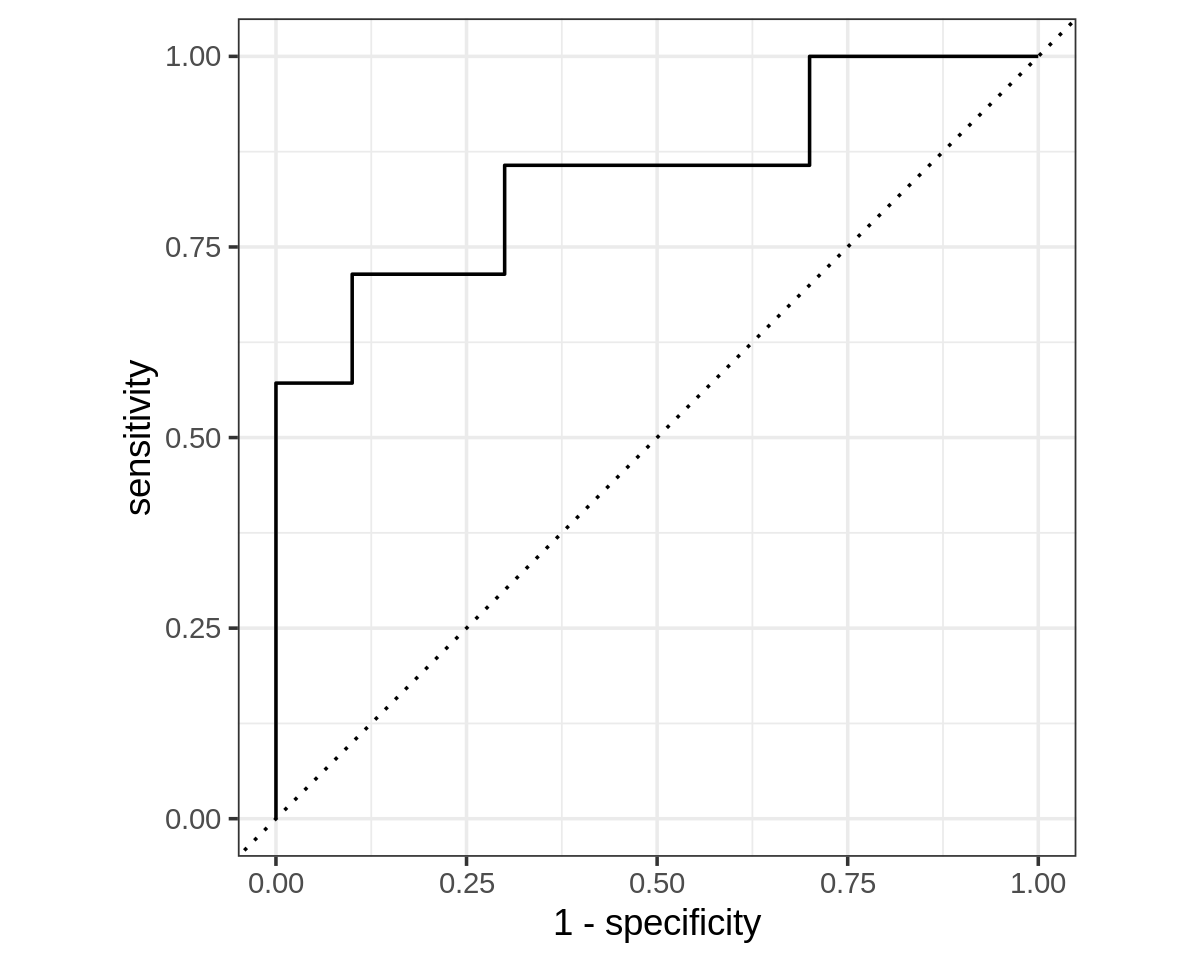

In [36]:
data_evaluation %>%
    yardstick::roc_curve(truth = popular,.pred_1,event_level = "second") %>%
    ggplot2::autoplot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="pipe_R" id="0oRKZmgN`nZ)x[DQ@:m{" x="9" y="-281"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id=".AHsRo-cMxQ$}nN-6C[T"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="M*o3?t]V^IYgC3ezSJv["><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">roc_curve</field><data>yardstick:roc_curve</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="|!jt(JB)U%%BLwZ0k$di"><field name="CODE">truth = popular</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="F|=.Cpa-q1l%!bd*d,Mw"><field name="CODE">.pred_1</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="Po5g[!%aRnjUMF]!K#aw"><field name="CODE">event_level = "second"</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="2!x0datsv`C?%0_J6Z3c"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">autoplot</field><data>ggplot2:autoplot</data></block></value></block></xml>

**QUESTION:**

If we decreased the recall to .50, what would the false positives be?

**ANSWER: (click here to edit)**

*zero*

This last part is something we didn't really get to develop in the first session.
We discussed how to interpret the coefficients of a logistic regression in terms of odds, but we did not show how to do this in code.

In the present model, the odds ratio shows how much more likely a property makes the candy `popular`.
For many of these, the property is just presence/absence.
For example, an odds ratio of 3.06 (hypothetical value) on chocolate means that having chocolate as an ingredient makes the candy 3.06 times more popular than candy without chocolate.

<!-- TODO: move this into the main notebook; we will have space if we take out the data cleaning currently there -->

We can extract model coefficients and calculate odds ratios the following way:

- `pipe`
    - `trained_model`
    - to with `hardhat` do `extract_fit_parsnip`
    - to with `generics` do `tidy`
    - to with `dplyr` do `mutate`
        - using `odds_ratio = exp(estimate)`
    - to with `dplyr` do `arrange`
        - using `odds_ratio`
        
*Note: `arrange` will sort the results by `odds_ratio`.*

In [62]:
trained_model %>%
    hardhat::extract_fit_parsnip() %>%
    generics::tidy() %>%
    dplyr::mutate(odds_ratio = exp(estimate)) %>%
    dplyr::arrange(odds_ratio)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="pipe_R" id="2}mL=7:yr{1XdUkH0}(k" x="-33" y="-65"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id=":y/^0/v_d)P|!zwhy~[E"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="lq,46?9_riQYB0K_=9K-"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_parsnip</field><data>hardhat:extract_fit_parsnip</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="]{N,B+:{LQKM-|.Lm+2#"><mutation items="1"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">tidy</field><data>generics:tidy</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="+5,fztQ8d`Rta)Qi%tzK"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="4hcw68ckhm*pTWoRjQaF"><field name="CODE">odds_ratio = exp(estimate)</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="rA+EbtB9,Wyk0ky4m)B-"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">arrange</field><data>dplyr:arrange</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="5PPeLgtmq5;BdB4#x+(W"><field name="CODE">odds_ratio</field></block></value></block></value></block></xml>

term,estimate,std.error,statistic,p.value,odds_ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.1056272,3.158466,-2.2497083,0.02446747,0.0008204749
hard,-2.4584673,1.489118,-1.6509548,0.09874780,0.0855659937
pricepercent,-1.6176350,1.677177,-0.9644989,0.33479587,0.1983672856
nougat,-1.5504863,1.614741,-0.9602073,0.33695088,0.2121447931
crispedricewafer,0.6096251,1.435934,0.4245494,0.67116515,1.8397415055
⋮,⋮,⋮,⋮,⋮,⋮
pluribus,2.320904,1.349835,1.719399,0.08554171,10.18488
bar,3.742186,1.924423,1.944576,0.05182609,42.19011
peanutyalmondy,3.968235,1.979940,2.004219,0.04504656,52.89109


**QUESTION:**

What are the top three *ingredients* that make something popular? Do any surprise you given the correlation matrix?

**ANSWER: (click here to edit)**

*`chocolate`, `peanutalmondy`, and `fruity` are the most positive for popularity. `fruity` is surprising because it was negatively correlated before, which may indicate a problem with the model. One way to test would be to have a model with `fruity` by itself as a predictor.*

<!--  -->